# Test notebook

This notebooks is a test whether and how notebooks work with github, how collaborative working works, and what problems can occur with different packages and stuff. First, let's try something ordinary:

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [3]:
x = np.linspace(0,10,100)
y = np.sin(x)

<IPython.core.display.Javascript object>


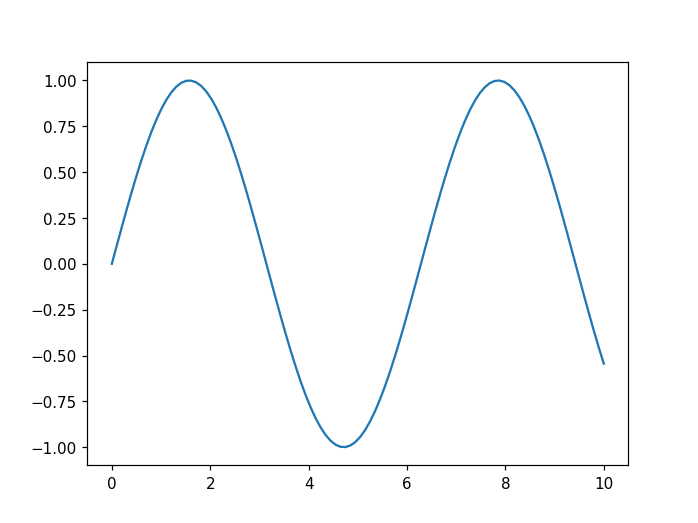

In [7]:
plt.figure()
plt.plot(x, y)
plt.show()

When you can see this graph, good!

Now, let's proceed to an actual machine learning task, which involves more specialized packages. First, we load packages (including one from our custom library) and then we do a PCA of some data generated with the SOAP descriptor.

In [29]:
from dscribe import descriptors
import ase as ase
import sys
from sklearn.decomposition import PCA

sys.path.append('../')
from library_ml.library import read_xyz

In [31]:
# load a trajectory
natoms, atoms, coordinates = read_xyz('01.xyz', multi = True)

# load conductivity
conductivity = np.log10(np.load('01.npy')[:, 167])

In [27]:
print('number of structures:\t', len(structures))
print('number of atoms:\t', natoms)

number of structures:	 1101
number of atoms:	 534


Okay, that looks good. We managed to load the raw data. Now comes the SOAP descriptor.

(111, 534, 680)


<IPython.core.display.Javascript object>


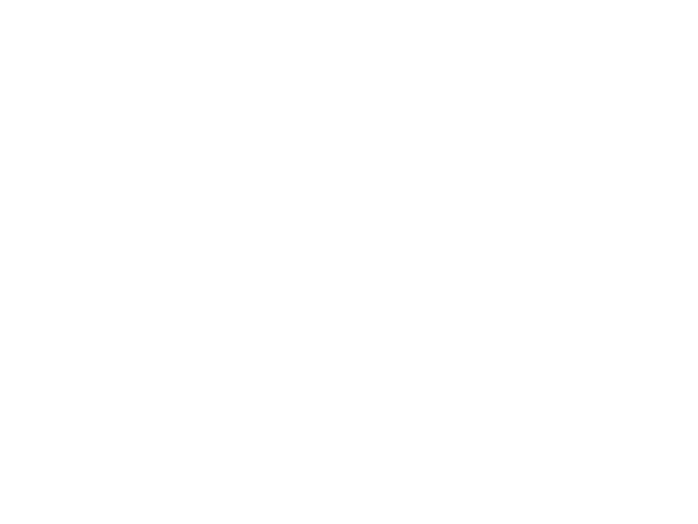

ValueError: Found array with dim 3. PCA expected <= 2.

In [34]:
features = []
soap = descriptors.SOAP(species = ['H', 'S', 'C', 'Au'],
                        periodic = False,
                        rcut = 6,
                        nmax = 4,
                        lmax = 4)

# create features (but only for every 10th structure)
for c in coordinates[::10]:
    mol = ase.Atoms(np.array(atoms), c)
    features.append(soap.create(mol))

features = np.array(features)
print(np.shape(features))

# do pca and plot it
pca = PCA(n_components = 2)

plt.figure()
plt.scatter(*pca.fit_transform(features), s = 0.1)
plt.show()